In [563]:
import json
from datetime import datetime
import plotly.express as px
from sklearn.model_selection import train_test_split
import sqlite3
import nltk
import spacy
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
import umap
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
%matplotlib inline

In [564]:
df_reviews_raw = pd.read_json('/Users/robholmstrom/Downloads/yelp_dataset/yelp_academic_dataset_review.json', lines = True)
df_businesses_raw = pd.read_json('/Users/robholmstrom/Downloads/yelp_dataset/yelp_academic_dataset_business.json', lines = True)



In [588]:
df_reviews_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8021122 entries, 0 to 8021121
Data columns (total 13 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
 9   year         int64         
 10  month        object        
 11  weekday      object        
 12  hour         int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 795.6+ MB


In [610]:
df_reviews = df_reviews_raw.drop(['year', 'month', 'weekday', 'hour'], axis = 1)

In [654]:
df_reviews['year'] = df_reviews.date.dt.year
# df_reviews['weekday'] = df_reviews_raw.date.dt.day_name
# df_reviews['hour'] = df_reviews_raw.date.dt.hour

In [655]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8021122 entries, 0 to 8021121
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
 9   year         int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 612.0+ MB


In [656]:
df_business = df_businesses_raw.copy()

In [657]:
review_by_year = df_reviews.date.dt.year.value_counts()

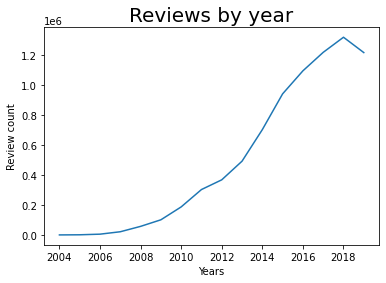

In [658]:
sns.lineplot(review_by_year.index,review_by_year.values )
plt.ylabel('Review count', fontsize = 10)  
plt.xlabel('Years', fontsize = 10)  
plt.title(label = 'Reviews by year', fontsize=20)
plt.show()

In [659]:
df_reviews_4yrs = df_reviews[df_reviews['year'].isin([2016, 2017, 2018, 2019])]
df_reviews_4yrs['year'].value_counts()

2018    1318054
2017    1217292
2019    1215836
2016    1094154
Name: year, dtype: int64

In [660]:
df_reviews_4yrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4845336 entries, 4 to 8021121
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
 9   year         int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 406.6+ MB


In [661]:
df_business_last_4yrs = df_business[(df_business['business_id'].isin(df_reviews_4yrs['business_id'].unique()))]

In [662]:
df_business_last_4yrs_open = df_business_last_4yrs.loc[df_business_last_4yrs['is_open']==1]

In [663]:
df_reviews_4yrs_open = df_reviews_4yrs[df_reviews_4yrs['business_id'].isin(df_business_last_4yrs_open['business_id'])]

In [664]:
df_reviews_4yrs_open.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4464625 entries, 4 to 8021121
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
 9   year         int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 374.7+ MB


In [665]:
df_business_last_4yrs_open.to_csv('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/capstone4_files/df_business_last_4yrs_open.csv')

In [666]:
df_reviews_4yrs_open.to_csv('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/capstone4_files/df_reviews_last_4yrs_open.csv')